In [1]:
# Importing neccesary libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Simulated Annealing on a mathematical function

In [2]:
'''
* The following function SA is used to calculate the global optimal of any single or multivariable function.
* The function takes the argumenst func,stpoint,T,lr as required arguments and max_iter, tol as key arguments

    - func is the function whose global minima is to be caculated, the argument should be a function
    
    - stpoint is the starting point from where we go to optima, 
        the argument should be numpy array containg the starting point of the variables
        
    - T is temprature, argument should be a float or int
    
    - lr is the learning rate, argment should be a float 
    
    - max_iter is the number of iteration to reach the optima.(by defalut it is taken 1000)
        - In case of optima not holding upto the tolerance specified this will number of times 
        the Annealing is performed
        
    - tol argument is the tolearnce(by defalut 1e-6) that if crossed then terminate the annealing to save time
'''

def SA(func, stpoint, T, lr, max_iter=1000, tol=1e-6):
    current_val = stpoint
    current_cost = func(stpoint)
    
    best_val = stpoint
    best_cost = func(stpoint)
    for i in range(max_iter):
        dx = (np.random.random_sample(*current_val.shape) - 0.5) * T
        new_val = current_val + dx
        new_cost = func(new_val)
        if new_cost < current_cost:
            current_cost = new_cost
            current_val = new_val
            if new_cost < best_cost:
                best_cost = new_cost
                best_val = new_val
        else:
            prob = np.exp(-(new_cost - current_cost) / T)
            if np.random.rand() < prob:
                current_cost = new_cost
                current_val = new_val
        
        T *= lr
        if T < tol:
            break
            
    return best_val, best_cost

## Approach 
The logic is same as the shown in the Week7 Presentation, I have just generalized the function using numpy arrays so that the function can be perforned on multivariable functions too.

## Observations
* I have observed that learning rate and temprature play a important role in determing the optima for this method, if the learning rate is too small then the algorith will halt because (tolerance would have be crossed) before even reaching the minimum and if too large then it will overstep the minimum and halt (because number of iteration will run out).
* The temprature play role in determining the probability of wheter or not move to next state; thus taking too small of temprature will halt the algorithm as tolerance will break the algorithm before reaching the the optima as the probabilty will become zero, too large of temprature and the number of iterations will be less to reach the optima.
* Also it is noticied that the annealing returns diffrent values on repeated running this is due to fact that I am using np.random which while name suggest random has at the end some algoritm that doesnt generate the random number perfectly, also the number of iterations, Temprature, learning rate also play role as explained above so it is expected to get diffrent answers, the ideal case would be infinte number of iteration, 0 tolerance, and infinitely small learning rate which is pratically not possible and effective, but the answers will be nearby of optima.

Hence both temprature and learning rate should be kept in mind while using the Simulated Annealing

In [3]:
# Single variable example
def yfunc(x):
    return x**2 + np.sin(8*x)

x,y = SA(yfunc,np.array(-2),3,0.95)
print(f'Minimum value found: {y} at {x}')

Minimum value found: -0.7514302756000852 at -0.10853326669535723


In [4]:
# Two variable example
def yfunc2(x):
    return x[0]**2 + np.sin(8*x[1])

x,y = SA(yfunc2,np.array([-2,-2]),3,0.95)
print(f'Minimum value found: {y} at {x}')

Minimum value found: -0.9182362894979523 at [-0.25228915 -0.95791964]


# Travelling Salesman Problem

In [8]:
'''
Functions:
    * read_cities 
    - Takes the file name and loads the x-cordinate and y-cordinates of the cites from the file
    and returns a numpy array containig the same
    * pythagores
        - Takes two arguments A and B which are the cordinates of city A and city B and returns
        the distance between them using pythagores theorm
    * total_distance
        - Takes two arguments a list of thesequence containg the order of moment from city to city and 
        second argument the cordinates of all the cities
        - This function returns the overall disatnce of path specified by sequence travelled by the salesman
    * SA_cities 
        - Takes arguments the cordinates of all the cities,Temprature,learning rate, and same key arguments 
        as above and performs the simulated annealing on it.
        - This returns the sequence and distance of the path after simulation
        
    * rand: return two random integers
    * change_path: returns after swapping some particular range of the cities

'''
import random
def read_cities(file):
    with open(file,'r') as f:
        number_of_cities = int(f.readline())
        cities = np.zeros((number_of_cities, 2))
        for i in range(number_of_cities):
            x, y = map(float, f.readline().split())
            cities[i] = [x, y]
    return cities

def pythagores(A,B):
    return np.sqrt(np.sum((A - B) ** 2))

def total_distance(sequence,cities_list):
    distance = 0
    for i in range(len(sequence)):
        distance += pythagores(cities_list[sequence[i]],cities_list[sequence[(i+1)%len(sequence)]])
    return distance


def rand(k,s):
    i = random.randint(k,s-1)
    j = random.randint(k,s-1)
    while(i==j):
        j = random.randint(k,s-1)
    return i,j
    

def change_path(order,i,j):
    #i,j = random.sample(range(n), 2 
    'Reverses the order of cities between two cities i and j'
    return order[:i] + order[i:j+1][::-1] + order[j+1:]
    
def SA_cities(cities, T, lr, max_iter=10000, tol=1e-6):
    start = list(range(len(cities)))
    #random.shuffle(start)
    n = len(cities)
    best_val = start
    best_cost = total_distance(start,cities)
    
    for i in range(max_iter):
        #dx = (np.random.random_sample(*current_val.shape) - 0.5) * T
        current_cost = total_distance(start,cities)
        #np.random.shuffle(start)
        k,j=rand(0,len(cities)-1)
        start = change_path(start,min(k,j),max(k,j))
        new_val = start
        #new_val = current_val + dx
        new_cost = total_distance(new_val,cities)

        
        if new_cost < current_cost:
            current_cost = new_cost
            current_val = new_val
            if new_cost < best_cost:
                best_cost = new_cost
                best_val = new_val
        else:
            prob = np.exp(-(new_cost - current_cost) / T)
            if np.random.rand() < prob:
                current_cost = new_cost
                current_val = new_val
            else:
                start = change_path(start,min(k,j),max(k,j))
        
        T *= lr
    
    return best_val, best_cost


## Approach 
* The algorithm as the simlar logic as the simulated annealing performed on a function,here first I assume the start sequence as the sequence given in file and the path length as the `best_cost`, the `current_cost` is the path legth of the previous order, then I use `np.random.shuffle` shuffles the sequnece and calculate the new cost using pythagores function, and store the new sequence in `new_val`
* If the new cost turn out to be less then current cost then the probabilty to move to next state is one hence move to next state, if the new cost is less than best cost then update the variables otherwise continue
* In case that the new cost is more than current cost then use exponential to calculate the probabilty of wherether or not move to next state, if moving to next state the update the variable, here I dont change best cost because if it has not met first condional then its is by default not best cost

In [12]:
# For 10 cities
citys = read_cities('tsp_10.txt')
x,y = SA_cities(citys,4,0.95,max_iter=10000)
print(f'Order: {x}')
print()
print(f'Path lenght: {y}')


Order: [8, 2, 0, 6, 5, 4, 3, 1, 7, 9]

Path lenght: 34.076561394636684


In [13]:
# For 100 cities
citys = read_cities('tsp_100.txt')
x,y = SA_cities(citys,4,0.95)
print(f'Order: {x}')
print()
print(f'Path lenght: {y}')
# ls=[]
# for i in range(1000):
#     x,y = SA_cities(citys,4,0.95)
    

Order: [6, 76, 16, 88, 17, 96, 64, 28, 91, 20, 66, 83, 69, 35, 67, 85, 43, 79, 1, 70, 9, 11, 37, 81, 44, 32, 33, 62, 10, 77, 41, 4, 89, 2, 5, 34, 0, 61, 60, 24, 94, 26, 78, 8, 23, 98, 46, 82, 56, 47, 68, 51, 49, 75, 58, 48, 13, 40, 74, 45, 87, 92, 57, 38, 72, 12, 63, 95, 84, 86, 25, 30, 19, 50, 42, 15, 39, 52, 65, 7, 93, 14, 27, 36, 21, 54, 71, 90, 29, 73, 59, 53, 31, 97, 55, 3, 22, 80, 18, 99]

Path lenght: 99.85236628200232


# Animation and Plots

In [16]:
'''
This is a function that animates the simulate annealing on one variable.
The first few lines are simple setting the plot and marker.

* SA_function Next: It is the exact copy-paste of above SA function, 
but here I have used yield instead of return key word so that I can iterate the value when I pass it 
in the update23 function.Also return would have halt the program after 1 iteration itself

* init: It is a function to set the plot

* update23: Function takes the point which is found using SA and updates the list of point that are to be animated
in the graph while keeping the previous points visible thus appendend the point in the list, while the marker needs
to appear moving it is instead of appendtion simply overitten by next value

* Return the animation object
'''
%matplotlib notebook
def animate_SA(func,start_point,T, lr, max_iterations=1000, tolerance=1e-6):
    
    fig, ax = plt.subplots()
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 5)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_title("Simulate Annealing")

    xdata, ydata = [], []
    
    line, = ax.plot([], [], 'o', lw=2)
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    x_vals = np.linspace(-10, 10, 1000)
    y_vals = func(x_vals)
    ax.plot(x_vals, y_vals, 'r')
    
    
    def SA_function(func, stpoint, T, lr, max_iter=1000, tol=1e-6):
        current_val = stpoint
        current_cost = func(stpoint)

        best_val = stpoint
        best_cost = func(stpoint)

        yield best_val, best_cost

        for i in range(max_iter):
            dx = (np.random.random_sample(*current_val.shape) - 0.5) * T
            new_val = current_val + dx
            new_cost = func(new_val)

            yield new_val, new_cost

            if new_cost < current_cost:
                current_cost = new_cost
                current_val = new_val
                if new_cost < best_cost:
                    best_cost = new_cost
                    best_val = new_val
            else:
                prob = np.exp(-(new_cost - current_cost) / T)
                if np.random.rand() < prob:
                    current_cost = new_cost
                    current_val = new_val

            T *= lr
            if T < tol:
                break

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x, y = frame
        xdata.append(x)
        ydata.append(y)
        line.set_data(xdata, ydata)
        lngood.set_data(x, y)
        return line,

    ani = FuncAnimation(fig, update, frames=SA_function(func,start_point,T, lr, max_iterations, tolerance), init_func=init, blit=True, repeat=False,interval =100)
    dis = ani
    plt.show()
    
    return dis

<IPython.core.display.Javascript object>


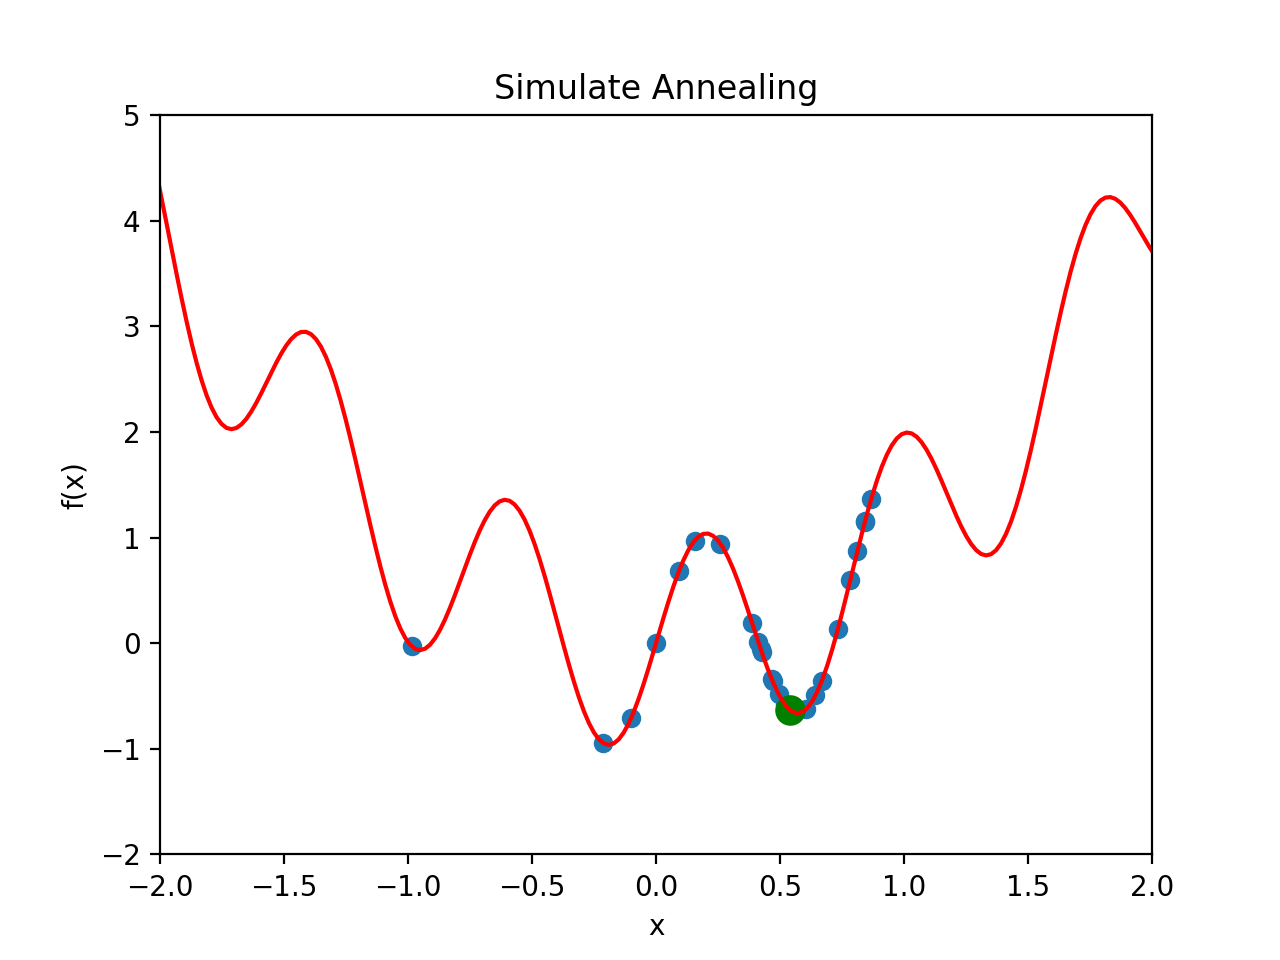

In [17]:
animate_SA(yfunc,np.array(0),3,0.9)

In [18]:
'''
Function to plot the cities, it takes the filename and uses the SA function to find the order of the cities
and and plots it
'''
def city_map(filename):
    citys = read_cities(filename)
    x,_ = SA_cities(citys,4,0.95)
    order = [citys[num] for num in x]
    x_values = [array[0] for array in order]
    y_values = [array[1] for array in order]
    x_values.append(x_values[0])
    y_values.append(y_values[0])
    plt.plot(x_values,y_values,'b')
    plt.plot(x_values,y_values,'ro')

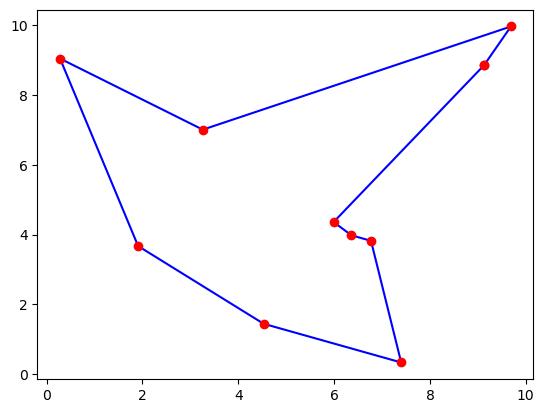

In [19]:
%matplotlib inline
city_map('tsp_10.txt')


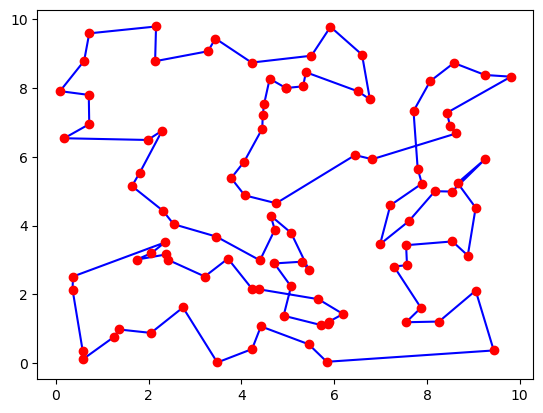

In [20]:
city_map('tsp_100.txt')